### UC-Project

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

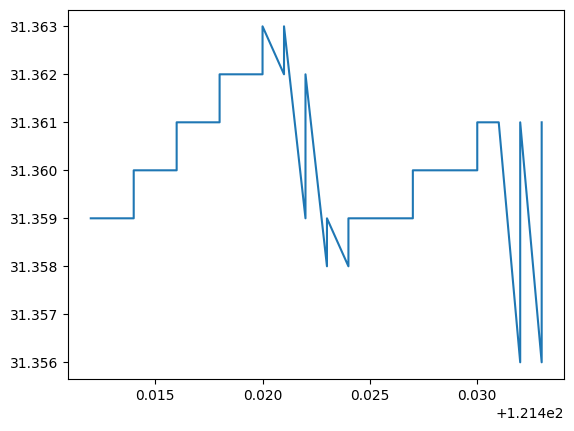

In [2]:
data_raw=pd.read_csv("data\mobike_shanghai_sample_updated.csv")
traj_test=data_raw.loc[15,"track"]

traj_test_parsed=np.array([p.split(',') for p in traj_test.split("#")],dtype=float)

plt.plot(traj_test_parsed[:,0],traj_test_parsed[:,1])

In [3]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap

# map_con = InMemMap("mymap", graph={
#     "A": ((1, 1), ["B", "C", "X"]),
#     "B": ((1, 3), ["A", "C", "D", "K"]),
#     "C": ((2, 2), ["A", "B", "D", "E", "X", "Y"]),
#     "D": ((2, 4), ["B", "C", "F", "E", "K", "L"]),
#     "E": ((3, 3), ["C", "D", "F", "Y"]),
#     "F": ((3, 5), ["D", "E", "L"]),
#     "X": ((2, 0), ["A", "C", "Y"]),
#     "Y": ((3, 1), ["X", "C", "E"]),
#     "K": ((1, 5), ["B", "D", "L"]),
#     "L": ((2, 6), ["K", "D", "F"])
# }, use_latlon=False)

# path = [(0.8, 0.7), (0.9, 0.7), (1.1, 1.0), (1.2, 1.5), (1.2, 1.6), (1.1, 2.0),
#         (1.1, 2.3), (1.3, 2.9), (1.2, 3.1), (1.5, 3.2), (1.8, 3.5), (2.0, 3.7),
#         (2.3, 3.5), (2.4, 3.2), (2.6, 3.1), (2.9, 3.1), (3.0, 3.2),
#         (3.1, 3.8), (3.0, 4.0), (3.1, 4.3), (3.1, 4.6), (3.0, 4.9)]

# matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

In [4]:
# from leuvenmapmatching import visualization as mmviz
# fig, ax = plt.subplots(1, 1)
# mmviz.plot_map(map_con, matcher=matcher,
#                ax=ax,
#                show_labels=True, show_matching=True, show_graph=True,
#                filename="my_plot.png")

In [5]:
# import networkx as nx
# import osmnx as ox
# ox.config(log_console=True, use_cache=True)

# G = ox.graph_from_place('Shanghai, China', network_type='bike')

In [6]:
# data=G.nodes.data()
# adj_lists=[x.split("#") for x in nx.generate_adjlist(G,delimiter="#")]
# adj_lists=[[int(x) for x in list] for list in adj_lists]
# dict_G={l[0]:((data[l[0]]['x'],data[l[0]]['y']),l[1:]) for l in adj_lists}

In [7]:
path=[tuple(p) for p in traj_test_parsed.tolist()]

In [8]:
# shanghai_map=InMemMap("mymap", graph=G, use_latlon=False)

# matcher = DistanceMatcher(shanghai_map)#, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

# # from leuvenmapmatching import visualization as mmviz
# # fig, ax = plt.subplots(1, 1)
# # mmviz.plot_map(shanghai_map, matcher=matcher,
# #                ax=ax,
# #                show_labels=True, show_matching=True, show_graph=True,
# #                filename="my_plot.png")

In [17]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap

# import osmnx as ox
# graph = ox.graph_from_place('Leuven, Belgium', network_type='bike', simplify=False)
# graph_proj = ox.project_graph(graph)

# map_con = InMemMap("myosm", use_latlon=True, use_rtree=False, index_edges=True)

# nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
# for nid, row in nodes_proj[['x', 'y']].iterrows():
#     map_con.add_node(nid, (row['x'], row['y']))
# for eid, _ in edges_proj.iterrows():
#     map_con.add_edge(eid[0], eid[1])

# # # Creation of the Leuven Map object from the OSM network
# # map_con = InMemMap("myosm", use_latlon=True, use_rtree=True, index_edges=True)
# # # Add the OSM network into the Leuven Map object
# # nodes_id = list(graph.nodes)
# # for node in nodes_id:
# #     lat = graph.nodes[node]['y']
# #     lon = graph.nodes[node]['x']
# #     map_con.add_node(node, (lat, lon))
# # edges_id = list(graph.edges)
# # for edge in edges_id:
# #     node_a, node_b = edge[0], edge[1]
# #     map_con.add_edge(node_a, node_b)
# #     map_con.add_edge(node_b, node_a)

# # map_con.purge()



# matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[]
Nodes
------
[]

Stats lattice
-------------
nbr levels               : 40
nbr lattice              : 0
avg lattice[level]       : 0.0
min lattice[level]       : 0
max lattice[level]       : 0


In [9]:
# import osmnx as ox
# graph = ox.graph_from_place('Shanghai, China', network_type='drive', simplify=False)
# graph_proj = ox.project_graph(graph)

In [10]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap
# map_con = InMemMap("myosm", use_latlon=True)#, use_rtree=True, index_edges=True)

# # Approach 2
# nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
# nodes_proj = nodes.to_crs("EPSG:3395")
# edges_proj = edges.to_crs("EPSG:3395")
# for nid, row in nodes_proj.iterrows():
#     map_con.add_node(nid, (row['lat'], row['lon']))

In [11]:
# matcher = DistanceMatcher(map_con)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


ValueError: math domain error

In [19]:
import time
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.distance import DistanceMatcher
import osmnx as ox

tic=time.time()
print("Loading map ...")
graph = ox.graph_from_place('Shanghai, China', network_type='drive', simplify=False)
print("Projecting map ...")
graph_proj = ox.project_graph(graph)


Loading map ...
Projecting map ...
Parsing graph ...


Searching closeby nodes with linear search, use an index and set max_dist


Map matching ... 


ValueError: math domain error

In [44]:
print("Parsing graph ...")

nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


Parsing graph ...


KeyError: 'x'

In [45]:
map_con = InMemMap("myosm", use_latlon=True, use_rtree=False, index_edges=True)

for nid, row in nodes_proj[['lon', 'lat']].iterrows():
    map_con.add_node(nid, (row['lon'], row['lat']))
for eid, _ in edges_proj.iterrows():
    map_con.add_edge(eid[0], eid[1])


In [48]:
from leuvenmapmatching import logger,logging
import sys

print("Map matching ... ")

logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))

matcher = DistanceMatcher(map_con, max_dist=0.1, obs_noise=1, min_prob_norm=0.5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()


Map matching ... 
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
